In [2]:
import os

import cv2
import matplotlib.pyplot as plt

In [3]:
data_dir = "../data/"


Subset: Training
glioma: 1321 images


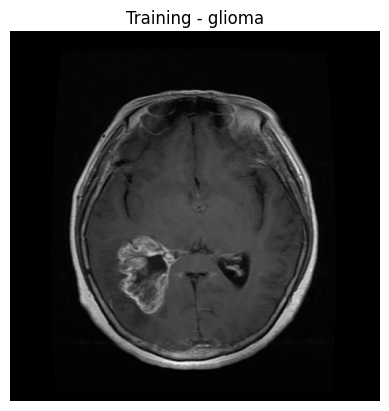

meningioma: 1339 images


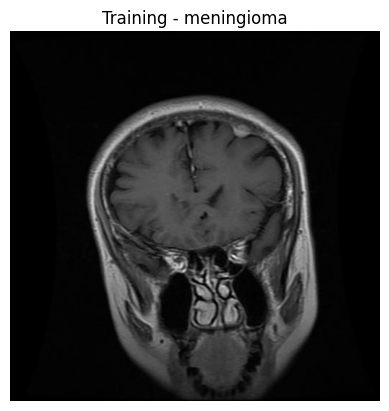

notumor: 1595 images


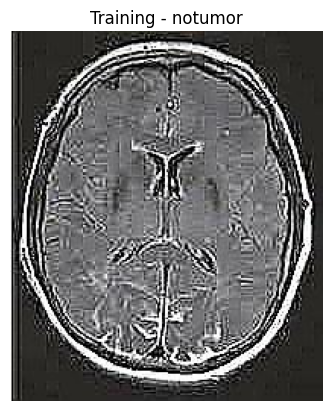

pituitary: 1457 images


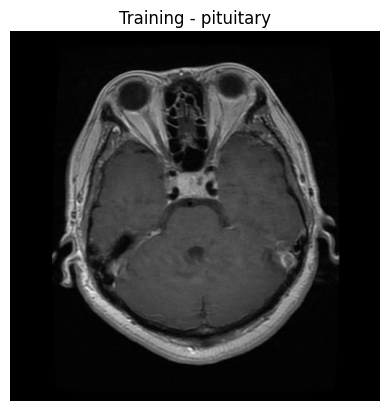


Subset: Testing
glioma: 300 images


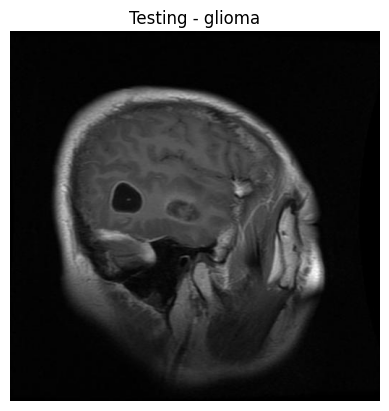

meningioma: 306 images


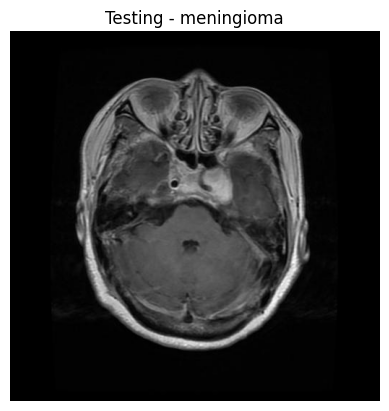

notumor: 405 images


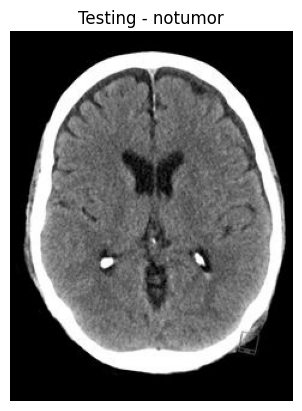

pituitary: 300 images


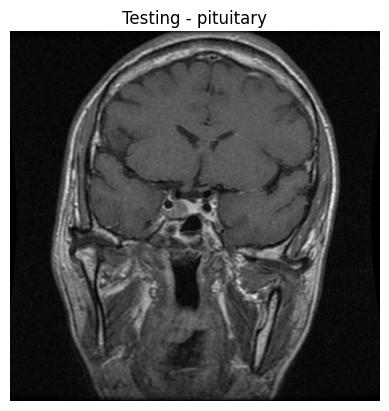

In [5]:
for subset in ["Training", "Testing"]:
    print(f"\nSubset: {subset}")
    for label in ["glioma", "meningioma", "notumor", "pituitary"]:
        path = os.path.join(data_dir, subset, label)
        files = os.listdir(path)
        print(f"{label}: {len(files)} images")

        img_path = os.path.join(path, files[0])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(f"{subset} - {label}")
        plt.axis("off")
        plt.show()

In [6]:
import numpy as np

In [8]:
shapes = []
sample_per_class = 50

for subset in ["Training", "Testing"]:
    for label in ["glioma", "meningioma", "notumor", "pituitary"]:
        folder = os.path.join(data_dir, subset, label)
        for img_name in os.listdir(folder)[:sample_per_class]:
            img = cv2.imread(os.path.join(folder, img_name))
            if img is not None:
                shapes.append(img.shape)

shapes = np.array(shapes)
print("Unique image shapes:", np.unique(shapes, axis=0))

Unique image shapes: [[ 168  300    3]
 [ 192  192    3]
 [ 195  314    3]
 [ 197  177    3]
 [ 198  150    3]
 [ 201  173    3]
 [ 208  233    3]
 [ 216  214    3]
 [ 216  224    3]
 [ 216  234    3]
 [ 217  232    3]
 [ 221  228    3]
 [ 222  227    3]
 [ 225  225    3]
 [ 226  233    3]
 [ 228  235    3]
 [ 230  174    3]
 [ 231  218    3]
 [ 232  217    3]
 [ 234  210    3]
 [ 234  219    3]
 [ 235  200    3]
 [ 235  214    3]
 [ 236  213    3]
 [ 236  214    3]
 [ 236  236    3]
 [ 237  212    3]
 [ 237  213    3]
 [ 238  212    3]
 [ 239  211    3]
 [ 240  210    3]
 [ 241  209    3]
 [ 242  208    3]
 [ 243  236    3]
 [ 244  206    3]
 [ 245  206    3]
 [ 248  208    3]
 [ 250  201    3]
 [ 251  201    3]
 [ 251  236    3]
 [ 252  200    3]
 [ 253  278    3]
 [ 256  256    3]
 [ 257  196    3]
 [ 259  194    3]
 [ 260  314    3]
 [ 262  224    3]
 [ 262  227    3]
 [ 280  212    3]
 [ 280  420    3]
 [ 282  230    3]
 [ 294  236    3]
 [ 295  236    3]
 [ 300  236    3]
 [ 308 

In [9]:
import pandas as pd
import seaborn as sns

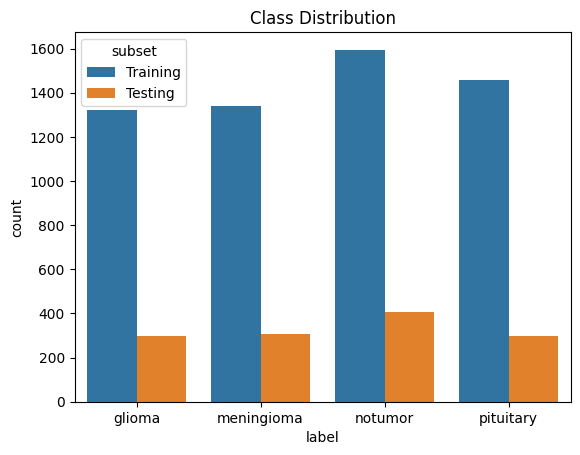

In [10]:
data = []

for subset in ["Training", "Testing"]:
    for label in ["glioma", "meningioma", "notumor", "pituitary"]:
        path = os.path.join(data_dir, subset, label)
        count = len(os.listdir(path))
        data.append({'subset': subset, 'label': label, 'count': count})

df = pd.DataFrame(data)

sns.barplot(data=df, x='label', y='count', hue='subset')
plt.title("Class Distribution")
plt.show()

In [12]:
df

,subset,label,count
0,Training,glioma,1321
1,Training,meningioma,1339
2,Training,notumor,1595
3,Training,pituitary,1457
4,Testing,glioma,300
5,Testing,meningioma,306
6,Testing,notumor,405
7,Testing,pituitary,300


In [13]:
corrupt_images = []

for subset in ["Training", "Testing"]:
    for label in ["glioma", "meningioma", "notumor", "pituitary"]:
        folder = os.path.join(data_dir, subset, label)
        for img_name in os.listdir(folder):
            img_path = os.path.join(folder, img_name)
            try:
                img = cv2.imread(img_path)
                if img is None or img.shape[0] == 0:
                    corrupt_images.append(img_path)
            except Exception:
                corrupt_images.append(img_path)

print("Corrupt images:", corrupt_images)

Corrupt images: []


In [18]:
means, stds = [], []

for subset in ["Training", "Testing"]:
    for label in ["glioma", "meningioma", "notumor", "pituitary"]:
        folder = os.path.join(data_dir, subset, label)
        for img_name in os.listdir(folder)[:100]:
            img_path = os.path.join(folder, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = img / 255.0
                means.append(img.mean(axis=(0, 1)))
                stds.append(img.std(axis=(0, 1)))

mean = np.mean(means, axis=0)
std = np.mean(stds, axis=0)

print("Mean:", mean)
print("Std:", std)

Mean: [0.18794892 0.18794641 0.18795056]
Std: [0.18724446 0.18724621 0.18725474]


In [20]:
img = cv2.imread("../data/Testing/glioma/Te-gl_0010.jpg")
print(img.shape)

r, g, b = cv2.split(img)
print((r == g).all(), (g == b).all()) 

(512, 512, 3)
True True
